In [631]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D,Dropout,Input,Activation,BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
from numpy import unique
from keras.layers import Dense, Conv1D, MaxPool1D, Flatten, Dropout # importing dense layer
from sklearn import preprocessing
from sklearn.preprocessing import (StandardScaler, OrdinalEncoder,LabelEncoder, MinMaxScaler, OneHotEncoder)
from sklearn.preprocessing import Normalizer, MaxAbsScaler , RobustScaler, PowerTransformer

In [632]:
dataset = pd.read_csv('../input/rainfall-prediction/dataset1.csv')

In [633]:
dataset

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7
...,...,...,...,...,...,...,...,...,...,...,...,...
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9


In [634]:
 dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [635]:
# remove attribute 'day'
dataset.drop(['day'],axis=1,inplace=True)
dataset.shape

(366, 11)

In [636]:
##dataset.label.value_counts()


In [637]:
#dataset = pd.get_dummies(dataset,columns=['rainfall'],prefix="",prefix_sep="")  
#dataset


In [638]:
#y_train_multi= dataset[['yes','no']]
#X_train_multi= dataset.drop(labels=['yes','no'], axis=1)

#print('X_train has shape:',X_train_multi.shape,'\ny_train has shape:',y_train_multi.shape)

In [639]:
dataset['rainfall'].value_counts()


yes    249
no     117
Name: rainfall, dtype: int64

In [640]:
multi_label = pd.DataFrame(dataset.rainfall)

le = preprocessing.LabelEncoder()
enc_label = multi_label.apply(le.fit_transform)
dataset['rainfall'] = enc_label
dataset

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,1,0.0,40.0,13.7
...,...,...,...,...,...,...,...,...,...,...,...
361,1022.7,18.8,17.7,16.9,15.0,84,90,1,0.0,30.0,18.4
362,1026.6,18.6,17.3,16.3,12.8,75,85,1,1.0,20.0,25.9
363,1025.9,18.9,17.7,16.4,13.3,75,78,1,4.6,70.0,33.4
364,1025.3,19.2,17.3,15.2,13.3,78,86,1,1.2,20.0,20.9


In [641]:
dataset

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,1,0.0,40.0,13.7
...,...,...,...,...,...,...,...,...,...,...,...
361,1022.7,18.8,17.7,16.9,15.0,84,90,1,0.0,30.0,18.4
362,1026.6,18.6,17.3,16.3,12.8,75,85,1,1.0,20.0,25.9
363,1025.9,18.9,17.7,16.4,13.3,75,78,1,4.6,70.0,33.4
364,1025.3,19.2,17.3,15.2,13.3,78,86,1,1.2,20.0,20.9


In [642]:
y_train= dataset[['rainfall']]
X_train= dataset.drop(labels=['rainfall'], axis=1)

print('X_train has shape:',X_train.shape,'\ny_train has shape:',y_train.shape)

X_train has shape: (366, 10) 
y_train has shape: (366, 1)


In [643]:
X_test=np.array(X_test)
y_test=np.array(y_test)

In [644]:
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20, random_state=42)

In [645]:
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.fit_transform(X_test)

In [646]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(292, 10, 1)

In [647]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(74, 10, 1)

In [648]:
 dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   pressure                366 non-null    float64
 1   maxtemp                 366 non-null    float64
 2   temparature             366 non-null    float64
 3   mintemp                 366 non-null    float64
 4   dewpoint                366 non-null    float64
 5   humidity                366 non-null    int64  
 6   cloud                   366 non-null    int64  
 7   rainfall                366 non-null    int64  
 8   sunshine                366 non-null    float64
 9            winddirection  365 non-null    float64
 10  windspeed               365 non-null    float64
dtypes: float64(8), int64(3)
memory usage: 31.6 KB


In [649]:
#from sklearn.preprocessing import LabelBinarizer

#y_train= LabelBinarizer().fit_transform(y_train)
 
#x_train=np.asarray(x_train).astype(np.float32)


In [650]:
model = Sequential() # initializing model
# input layer and first layer with 50 neurons
model.add(Conv1D(128, 3, padding="same",input_shape = (X_train.shape[1], 1), activation='relu'))
model.add(MaxPool1D(pool_size=(2)))  
model.add(Dropout(0.2))
model.add(Conv1D(128, 3, padding="same", activation='relu'))
model.add(MaxPool1D(pool_size=(2)))  
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(units=64))
# output layer with softmax activation
model.add(Dense(units=1,activation='sigmoid'))

In [651]:
# defining loss function, optimizer, metrics and then compiling model
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

In [652]:
# summary of model layers
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_44 (Conv1D)           (None, 10, 128)           512       
_________________________________________________________________
max_pooling1d_44 (MaxPooling (None, 5, 128)            0         
_________________________________________________________________
dropout_44 (Dropout)         (None, 5, 128)            0         
_________________________________________________________________
conv1d_45 (Conv1D)           (None, 5, 128)            49280     
_________________________________________________________________
max_pooling1d_45 (MaxPooling (None, 2, 128)            0         
_________________________________________________________________
dropout_45 (Dropout)         (None, 2, 128)            0         
_________________________________________________________________
flatten_22 (Flatten)         (None, 256)             

In [653]:
# training the model on training dataset
history = model.fit(X_train, y_train, epochs=100, batch_size=300,validation_split=0.2)

Epoch 1/100
1/1 [==============================] - 1s 681ms/step - loss: 0.7080 - accuracy: 0.4120 - val_loss: nan - val_accuracy: 0.7458
Epoch 2/100
1/1 [==============================] - 0s 42ms/step - loss: 0.6534 - accuracy: 0.6695 - val_loss: nan - val_accuracy: 0.7458
Epoch 3/100
1/1 [==============================] - 0s 24ms/step - loss: 0.6243 - accuracy: 0.6567 - val_loss: nan - val_accuracy: 0.7458
Epoch 4/100
1/1 [==============================] - 0s 24ms/step - loss: 0.6108 - accuracy: 0.6738 - val_loss: nan - val_accuracy: 0.7458
Epoch 5/100
1/1 [==============================] - 0s 24ms/step - loss: 0.5857 - accuracy: 0.6867 - val_loss: nan - val_accuracy: 0.7966
Epoch 6/100
1/1 [==============================] - 0s 24ms/step - loss: 0.5620 - accuracy: 0.7339 - val_loss: nan - val_accuracy: 0.7797
Epoch 7/100
1/1 [==============================] - 0s 24ms/step - loss: 0.5353 - accuracy: 0.7554 - val_loss: nan - val_accuracy: 0.8475
Epoch 8/100
1/1 [=======================

In [654]:
# predicting target attribute on testing dataset
score =model.evaluate(X_test, y_test, verbose=1)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
  

3/3 [==============================] - 0s 4ms/step - loss: 0.5450 - accuracy: 0.7568
Test loss: 0.5449533462524414
Test accuracy: 0.7567567825317383


Text(0, 0.5, 'Loss')

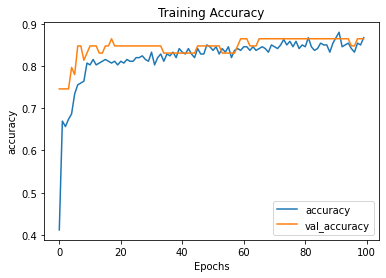

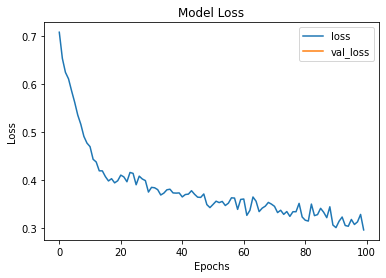

In [655]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history)

pd.DataFrame(history.history)[["accuracy", "val_accuracy"]].plot()
plt.title("Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("accuracy")

pd.DataFrame(history.history)[["loss", "val_loss"]].plot()
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")